# League of Legends Model - Training
Uses stats from 10k high diamond ranked games at 10 min, with 19 features per team (total 38).

From https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min?resource=download

## Imports

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier, plot_importance
import pickle

## EDA

In [2]:
data = pd.read_csv('data/high_diamond_ranked_10min.csv')

In [47]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

print("\nColumns:")
for i, column in enumerate(data.columns):
    # if data[column].dtype == type(object):
    #     le = preprocessing.LabelEncoder()
    #     data[column] = le.fit_transform(data[column])
    print(i, column)
data.head(5)

Number of rows: 9879
Number of columns: 40

Columns:
0 gameId
1 blueWins
2 blueWardsPlaced
3 blueWardsDestroyed
4 blueFirstBlood
5 blueKills
6 blueDeaths
7 blueAssists
8 blueEliteMonsters
9 blueDragons
10 blueHeralds
11 blueTowersDestroyed
12 blueTotalGold
13 blueAvgLevel
14 blueTotalExperience
15 blueTotalMinionsKilled
16 blueTotalJungleMinionsKilled
17 blueGoldDiff
18 blueExperienceDiff
19 blueCSPerMin
20 blueGoldPerMin
21 redWardsPlaced
22 redWardsDestroyed
23 redFirstBlood
24 redKills
25 redDeaths
26 redAssists
27 redEliteMonsters
28 redDragons
29 redHeralds
30 redTowersDestroyed
31 redTotalGold
32 redAvgLevel
33 redTotalExperience
34 redTotalMinionsKilled
35 redTotalJungleMinionsKilled
36 redGoldDiff
37 redExperienceDiff
38 redCSPerMin
39 redGoldPerMin


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [49]:
data.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


## Preprocessing

In [3]:
train_val, test = train_test_split(data, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, test_size=0.3, random_state=42)

train_X = train.drop(columns=['gameId', 'blueWins'])
train_y = pd.DataFrame(train['blueWins'])

val_X = val.drop(columns=['gameId', 'blueWins'])
val_y = pd.DataFrame(val['blueWins'])

test_X = test.drop(columns=['gameId', 'blueWins'])
test_y = pd.DataFrame(test['blueWins'])

In [4]:
scaler = preprocessing.StandardScaler()
train_X_scaled = pd.DataFrame(scaler.fit_transform(train_X), columns=train_X.columns)
val_X_scaled = pd.DataFrame(scaler.transform(val_X), columns=val_X.columns)
test_X_scaled = pd.DataFrame(scaler.transform(test_X), columns=test_X.columns)

In [7]:
for i, column in enumerate(train_X_scaled.columns):
    if type(column) != str:
        print(i, column)

## Model - Training

In [8]:
model = XGBClassifier()
model.fit(train_X_scaled, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [9]:
model_name = 'xgb'
with open("models/" + model_name + ".pkl", "wb") as file:
    pickle.dump(model, file)

## Model - Testing

In [10]:
predictions = model.predict(val_X)

In [11]:
accuracy = accuracy_score(val_y, predictions)

print(f"Accuracy: {round(accuracy*100, 2)}%")
print("\nClassification report:")
print(classification_report(val_y, predictions))

Accuracy: 55.25%

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.18      0.29      1197
           1       0.53      0.93      0.67      1174

    accuracy                           0.55      2371
   macro avg       0.63      0.56      0.48      2371
weighted avg       0.63      0.55      0.48      2371



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

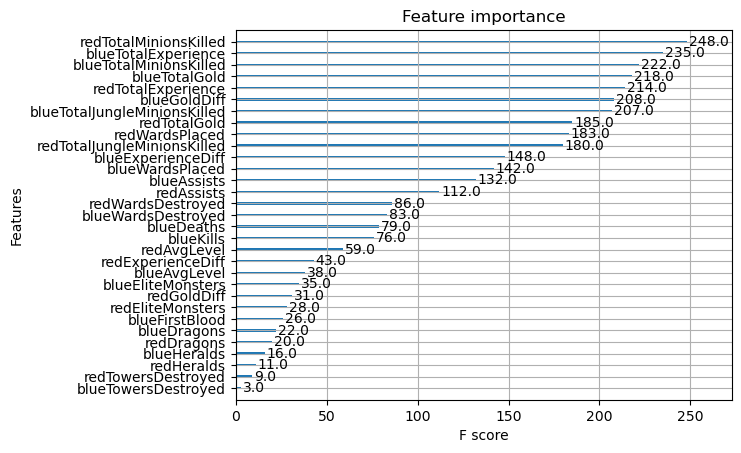

In [12]:
plot_importance(model)